In [2]:
##Q1
##a) & b)


import pandas as pd

##read two files
Consultants = pd.read_excel("SalesConsultants.xlsx")
Managers = pd.read_excel("SalesManagers.xlsx")

##calculate annual sales in consultants
Consultants['Annual Sales'] = Consultants['Q1'] + Consultants['Q2'] + Consultants['Q3'] + Consultants['Q4']

##  a loop will be execuated if 'continuing' is True
continuing = True
while continuing:
    Search = input(
        "What information would like to search(C for Consultants, M for Managers, Others for Quit): ").upper()
    if Search == 'M':
        df_group = Consultants.groupby(
            by='SID').sum()  ##groupby consultants by 'SID', following 'S01', 'S02', 'S03'......
        info = pd.merge(df_group, Managers, how='left', on='SID')  ##merge into a dataframe

        count = Consultants.groupby(by='SID').size()  ## obtain the number of agents supervised by a supervisor
        counts = pd.Series(count)

        ManagerID = input("Please input a manager ID: ").upper()

        ##say whether the select one is in file or not. if not will output True, and thus notice the users
        if info[info.SID == ManagerID].empty:
            print("No record found, please correct your input\n")

        else:  ##only input consultant id is in file will be processed
            select = info.loc[info['SID'] == ManagerID].T   ##print select

            list1 = select.values.tolist()   ##replace('[', '').replace(']', '').replace("'", '').replace(',', '')

            print("{0:<20s}{1:^5}{2:>20s}{3:>5s}".format('Supervisor', ':',
                                                         str(list1[6]).replace('[', '').replace(']', '').replace("'", '')
                                                         , str(list1[0]).replace('[', '').replace(']', '').replace("'", '')))
            print("{0:<20s}{1:^5}{2:>20d}".format('# of Consultants', ':', counts[ManagerID]))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 1 Sales', ':', int(str(list1[1]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 2 Sales', ':', int(str(list1[2]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 3 Sales', ':', int(str(list1[3]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 4 Sales', ':', int(str(list1[4]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Annual Sales', ':', int(str(list1[5]).replace('[', '').replace(']', ''))))

    ## if searching consultant information
    elif Search == 'C':
        ConsultantID = input("Please input a Consultant ID: ").upper()

        ##say whether the select one is in file or not. if not will output True, and thus notice the users
        if Consultants[Consultants.AgentID == ConsultantID].empty:
            print("No record found, please correct your input\n")
        ##only input consultant id is in file will be processed
        else:
            CInfo = Consultants[Consultants.AgentID == ConsultantID]
            CInfo = pd.merge(CInfo, Managers, how='left', on='SID').T
            ## print(CInfo)
            list2 = CInfo.values.tolist()  ##replace('[', '').replace(']', '').replace("'", '').replace(',', '')
            ## print(list2)
            print("{0:<20s}{1:^5}{2:>20s}{3:>5s}".format('Supervisor', ':',
                                                         str(list2[8]).replace('[', '').replace(']', '').replace("'", ''),
                                                         str(list2[2]).replace('[', '').replace(']', '').replace("'", '')))
            print("{0:<20s}{1:^5}{2:>20s}".format('AgentID', ':',
                                                  str(list2[0]).replace('[', '').replace(']', '').replace("'", '')))
            print("{0:<20s}{1:^5}{2:>20s}".format('AgentName', ':',
                                                  str(list2[1]).replace('[', '').replace(']', '').replace("'", '')))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 1 Sales', ':',
                                                   int(str(list2[3]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 2 Sales', ':',
                                                   int(str(list2[4]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 3 Sales', ':',
                                                   int(str(list2[5]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Quarter 4 Sales', ':',
                                                   int(str(list2[6]).replace('[', '').replace(']', ''))))
            print("{0:<20s}{1:^5}{2:>20,d}".format('Annual Sales', ':',
                                                   int(str(list2[7]).replace('[', '').replace(']', ''))))
    else:
        break
print("\nBye~")

What information would like to search(C for Consultants, M for Managers, Others for Quit): M
Please input a manager ID: S06
Supervisor            :             Iris Wong  S06
# of Consultants      :                     5
Quarter 1 Sales       :             2,422,002
Quarter 2 Sales       :             3,593,414
Quarter 3 Sales       :             3,518,855
Quarter 4 Sales       :             2,699,910
Annual Sales          :            12,234,181
What information would like to search(C for Consultants, M for Managers, Others for Quit): m
Please input a manager ID: m03
No record found, please correct your input

What information would like to search(C for Consultants, M for Managers, Others for Quit): c
Please input a Consultant ID: a94131
Supervisor            :          Rebecca Chao  S01
AgentID               :                A94131
AgentName             :                Harper
Quarter 1 Sales       :               407,671
Quarter 2 Sales       :               667,749
Quarter 3 Sales 

In [35]:
##Q2

import pandas as pd

## defiine the function
def find_state(df, state='NY'):
    if df[df.state == state].empty:
        print("Please correct your input")
    else:
        print(df.loc[df['state']==state].head())

## read and input the dataframe
df = pd.read_excel("airports.xlsx")      ##index_col='state'

continuing = True
while continuing: 
    ## input the state you want to know
    state = input("please input a state short name: ").upper()
    find_state(df, state)
    determine = input("whether continue your search?(yes/no)").lower()
    if determine == 'no':
        break
print('Bye~')

please input a state short name: a
Please correct your input
whether continue your search?(yes/no)yes
please input a state short name: al
   iata                airport         city state country        lat  \
6   02A            Gragg-Wade       Clanton    AL     USA  32.850487   
15  06A       Moton  Municipal     Tuskegee    AL     USA  32.460472   
25  08A     Wetumpka Municipal     Wetumpka    AL     USA  32.529439   
29  09A  Butler-Choctaw County       Butler    AL     USA  32.119313   
35  0A8            Bibb County  Centreville    AL     USA  32.936791   

         long  
6  -86.611453  
15 -85.680036  
25 -86.328221  
29 -88.127462  
35 -87.088883  
whether continue your search?(yes/no)yes
please input a state short name: ny
   iata                 airport            city state country        lat  \
3   01G            Perry-Warsaw           Perry    NY     USA  42.741347   
19  06N                Randall       Middletown    NY     USA  41.431566   
42  0B8              Elizabe

In [34]:
##Q2 alternative

import pandas as pd

## defiine the function
def find_state(df, state='NY'):
    print(df.loc[[state]].head())


## input the state you want to know
state = input("please input a state short name: ").upper()
## read and input the dataframe
df = pd.read_excel("airports.xlsx", index_col='state')  ## index_col='state'
find_state(df, state)


please input a state short name: al
      iata                airport         city country        lat       long
state                                                                       
AL     02A            Gragg-Wade       Clanton     USA  32.850487 -86.611453
AL     06A       Moton  Municipal     Tuskegee     USA  32.460472 -85.680036
AL     08A     Wetumpka Municipal     Wetumpka     USA  32.529439 -86.328221
AL     09A  Butler-Choctaw County       Butler     USA  32.119313 -88.127462
AL     0A8            Bibb County  Centreville     USA  32.936791 -87.088883


In [15]:
##Q3

import pandas as pd

##read file
df = pd.read_excel("tips.xlsx") 

##seperate dataframe into 3 sub frames with roughly equal number and display
df1 = df.iloc[:int(len(df.index)/3), 1:8]
print(df1, '\n')

df2 = df.iloc[int(len(df.index)/3):int(2*len(df.index)/3), 1:8]
print(df2, '\n')

df3 = df.iloc[int(2*len(df.index)/3):, 1:8]
print(df3, '\n')
print(15*'*~*', '\n')

##concatenate 2 sub frames
frames = [df1, df2]
new = pd.concat(frames)

##print a pivot table with the time column as the horizontal index and the sex column as the vertical index.
print(new.pivot_table('tip', index='sex', columns='time'), '\n')
print(new.pivot_table("tip", index='sex', columns='time', aggfunc={'tip': ['mean', 'std']}))    ##plus mean and standard deviation

    total_bill   tip     sex smoker   day    time  size
0        169.9  10.1  Female     No   Sun  Dinner     2
1        103.4  16.6    Male     No   Sun  Dinner     3
2        210.1  35.0    Male     No   Sun  Dinner     3
3        236.8  33.1    Male     No   Sun  Dinner     2
4        245.9  36.1  Female     No   Sun  Dinner     4
..         ...   ...     ...    ...   ...     ...   ...
76       179.2  30.8    Male    Yes   Sat  Dinner     2
77       272.0  40.0    Male     No  Thur   Lunch     4
78       227.6  30.0    Male     No  Thur   Lunch     2
79       172.9  27.1    Male     No  Thur   Lunch     2
80       194.4  30.0    Male    Yes  Thur   Lunch     2

[81 rows x 7 columns] 

     total_bill   tip     sex smoker   day    time  size
81        166.6  34.0    Male     No  Thur   Lunch     2
82        100.7  18.3  Female     No  Thur   Lunch     1
83        326.8  50.0    Male    Yes  Thur   Lunch     2
84        159.8  20.3    Male     No  Thur   Lunch     2
85        348.3  5

In [5]:
##Q4

import pandas as pd

## define a function
def df_manipulate(df): 
    
    ## calculate sepal_length_sum
    sepal_length_sum = df[['sepal length (in cm)']].sum()
    print("The sum of 'sepal length' is (in cm):", float(sepal_length_sum))
    
    dfT = pd.DataFrame(data=df).T              ##transpose
    print('\n', dfT)

## read the file
df = pd.read_csv("iris.csv")
df_manipulate(df)

The sum of 'sepal length' is (in cm): 876.5

                               0            1            2            3    \
sepal length (in cm)          5.1          4.9          4.7          4.6   
sepal width (in cm)           3.5            3          3.2          3.1   
petal length (in cm)          1.4          1.4          1.3          1.5   
petal width (in cm)           0.2          0.2          0.2          0.2   
class                 Iris-setosa  Iris-setosa  Iris-setosa  Iris-setosa   

                              4            5            6            7    \
sepal length (in cm)            5          5.4          4.6            5   
sepal width (in cm)           3.6          3.9          3.4          3.4   
petal length (in cm)          1.4          1.7          1.4          1.5   
petal width (in cm)           0.2          0.4          0.3          0.2   
class                 Iris-setosa  Iris-setosa  Iris-setosa  Iris-setosa   

                              8         

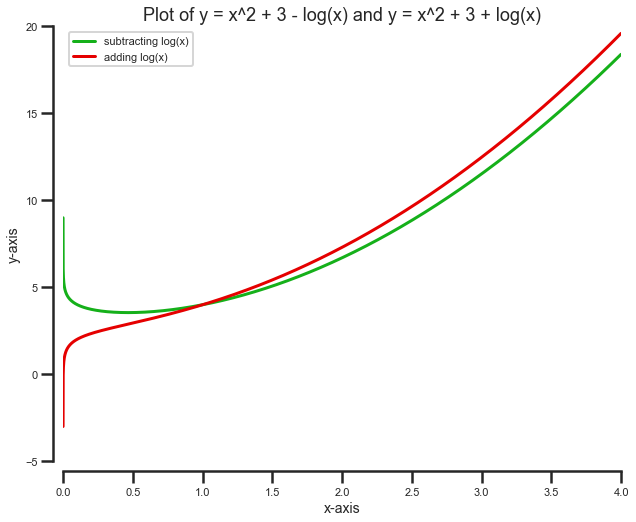

In [12]:
##Q5

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

## pre-configure color, context, style
g_color = [sns.xkcd_rgb['green'], sns.xkcd_rgb['red']]
sns.set_context('poster', font_scale=0.5)
sns.set_style('darkgrid')
sns.set_style('ticks')

## define the domain
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(1e-6, 4, 1e-4)

## calculate y1 & y2
y1 = x**2 + 3 - [math.log(a, 10) for a in x]
y2 = x**2 + 3 + [math.log(a, 10) for a in x]

## set title, x and y label
ax.set_title("Plot of y = x^2 + 3 - log(x) and y = x^2 + 3 + log(x)", fontsize=18)
ax.set_xlabel("x-axis", fontsize=14)
ax.set_ylabel("y-axis", fontsize=14)

## set limit and the presentation on 2 axises
ax.set_xlim(0, 4)
ax.set_ylim(-5, 20)
ax.set_xticks(np.arange(0, 4.5, 0.5))
ax.set_yticks(np.arange(-5, 25, 5))

## plot with legend
ax.plot(x, y1, label='subtracting log(x)', color=g_color[0])
ax.plot(x, y2, label='adding log(x)', color=g_color[1])

## set legend location 
plt.legend(loc='best')
sns.despine(offset=10, trim=True)
plt.show()

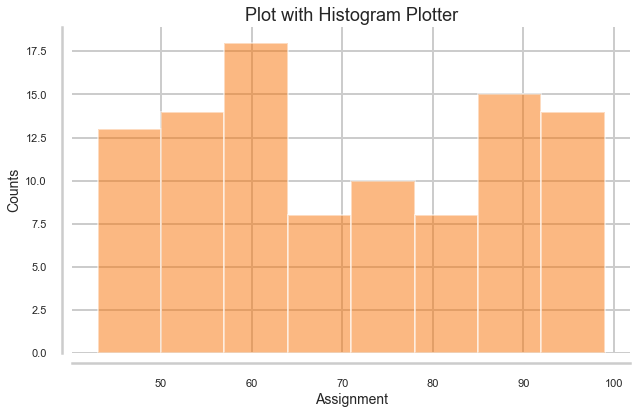

In [2]:
##Q6

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## define histogram_plotter
def histogram_plotter(df, col, bins=10):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ## pre-configure drawing style with seaborn
    sns.set_context('poster', font_scale=0.5)
    sns.set_style('whitegrid')
    
    ## set title and labels
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_title('Plot with Histogram Plotter', fontsize=18)
    
    ## draw histogram setting the color 'orange'
    plt.hist(df[[col]], bins=bins, alpha=0.5, color=sns.xkcd_rgb['orange'])
    sns.despine(offset=10, trim=False)

sData = pd.read_excel('StudentData.xlsx')  ## read the Excel file into sData
histogram_plotter(sData, 'Assignment', 8)                                         ## import the data into function histogram_plotter
plt.show()

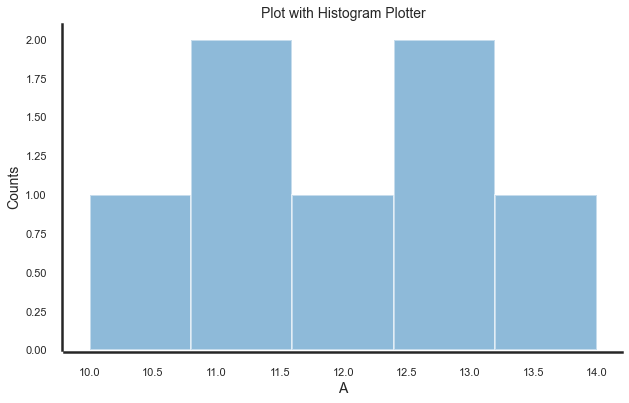

In [31]:
##Q6 alternative situation

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def histogram_plotter(df, col, bins=10):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.set_context('poster', font_scale=0.5)
    sns.set_style('white')
    
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_title('Plot with Histogram Plotter', fontsize=14)
    plt.hist(df[[col]], bins=bins, alpha=0.5)
    sns.despine(offset=2, trim=False)

dt = {"A": [10, 11, 12, 13, 14, 11, 13],
      "B": [20, 21, 22, 23, 24, 22, 24],
      "C": [30, 31, 32, 33, 34, 34, 33],
      "D": [40, 41, 42, 43, 44, 43, 42],
      "E": [50, 51, 52, 53, 54, 50, 51]}
df = pd.DataFrame(dt)
histogram_plotter(df, 'A', 5)